# Importing package

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.style.use('fivethirtyeight')

#Import common utilities
import math
from collections import Counter

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, MiniBatchKMeans

# Accuracy Evaluation
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 505)

# Import data

In [62]:
listings_df = pd.read_csv('D:\\MyProjects\\01_Airbnb\\Data\\Boston_listings.csv', sep=',',usecols = ['id', 'name', 'space', 'description', 'neighborhood_overview', 'neighbourhood_cleansed'])
listings_df.shape   # (3818, 92)

(3585, 6)

# Clustering rooms based on owner's descriptions
https://www.kaggle.com/aussie84/clustering-rooms-based-on-owner-s-descriptions

## Designing Features

In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

### Check missing values

In [6]:
def Check_Missing_Data(df):    
    # count all missing values of each column
    total = df.isnull().sum().sort_values(ascending=False)
    # calculate percentage of null values for each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_values_df = Check_Missing_Data(listings_df)
missing_values_df

,Total,Percent
neighbourhood_group_cleansed,3585,1.000000
jurisdiction_names,3585,1.000000
license,3585,1.000000
has_availability,3585,1.000000
square_feet,3529,0.984379
monthly_price,2697,0.752301
weekly_price,2693,0.751185
security_deposit,2243,0.625662
notes,1975,0.550907
interaction,1554,0.433473


### Function and class definitions

In [61]:
class LemmaTokenizer(object):
    """Custom tokenizer class that stems tokens"""
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self,doc):
        return [self.wnl.lemmatize(t) for t in wordpunct_tokenize(doc) if len(t.strip()) > 1]
    
def show_topn(classifier,vectorizer,categories,n):
    """Returns the top n features that characterize eachc category"""
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        topn = np.argsort(classifier.coef_[i])[-n:]
        print('{}: {}'.format(category,", ".join(feature_names[topn])))
        
def save_topn(classifier,vectorizer,categories,n,outdict):
    """Returns the top n features that characterize eachc category, and save result in outdict"""
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        topn = np.argsort(classifier.coef_[i])[-n:]
        outdict[i] = feature_names[topn]

#### price

In [7]:
listings_df['price'].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [8]:
listings_df['price'].isnull().sum()

0

In [10]:
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")

In [11]:
listings_df['price'].head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

In [12]:
def count_word(df, column_name):
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
    
    return values_sorted 

### Feature matrix with numerical variables

In [20]:
features = listings_df[['host_listings_count', 'host_total_listings_count', 'accommodates', 
                     'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
                     'review_scores_rating']]

In [21]:
features.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating
0,1,1,4,1.5,2.0,3.0,250.0,1,0,NaN
1,1,1,2,1.0,1.0,1.0,65.0,0,36,94.0
2,1,1,2,1.0,1.0,1.0,65.0,1,41,98.0
3,1,1,4,1.0,1.0,2.0,75.0,2,1,100.0
4,1,1,2,1.5,1.0,2.0,79.0,1,29,99.0


In [63]:

# let's combine the name, space, description, and neighborhood_overview into a new column
listings_df['combined_description'] = listings_df.apply(lambda x: '{} {} {} {}'.format(x['name'], x['space'], x['description'], x['neighborhood_overview']), axis=1)
print(listings_df.loc[0,'combined_description'])

Sunny Bungalow in the City The house has an open and cozy feel at the same time.  The living room has a flat screen TV.  The kitchen has all you need for cooking.  We prefer you buy your food but can use the organic oils, herbs, etc.   The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way.  We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure. Cozy, sunny, family home.  Master bedroom high ceilings. Deck, garden with hens, beehives & play structure.   Short walk to charming village with  attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation. The house has an open and cozy feel at the same time.  The living room has a flat screen TV.  The kitchen has all you need for cooking.  We prefer you buy your food but can use the organic oils, herbs, etc.   The yard can be seen from sittin

In [67]:
# Transform combined_description into tfidf format
tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words='english',tokenizer=LemmaTokenizer())
tfidf.fit(listings_df['combined_description'])
DescTfidf = tfidf.transform(listings_df['combined_description'])

In [69]:
DescTfidf

<3585x132128 sparse matrix of type '<class 'numpy.float64'>'
	with 630480 stored elements in Compressed Sparse Row format>

### How many listings are there for each neighborhood?

Text(0.5,1,'Number of Listings in Each Neighbourhood')

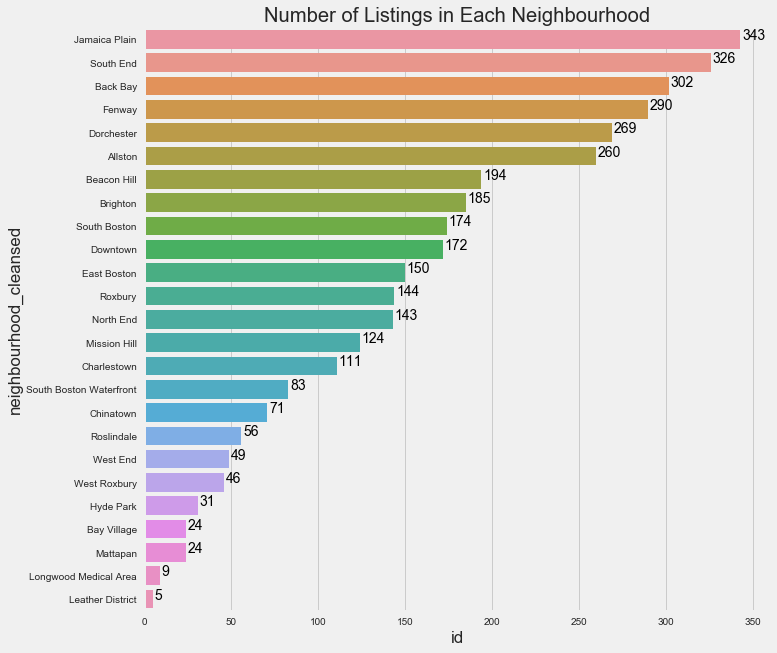

In [70]:
# I added a chart to replace tabulation in the original notebook

neighborRank = listings_df.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False)
# print(neighborRank)
plt.figure(figsize=(10,10))
g = sns.barplot(y=neighborRank.index,x=neighborRank["id"])
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighborRank["id"])]
plt.title('Number of Listings in Each Neighbourhood')

### K-Means Clustering with 6 segments

In [71]:
# Create K-Means using MiniBatchKMeans. The MiniBatch version works much faster than regular KMeans
kmeans6 = MiniBatchKMeans(n_clusters=6)
DescKmeans6 = kmeans6.fit_predict(DescTfidf.todense())

In [74]:
# Combine description, cluster, and neighborhood into one dataframe. 
FullDescKmeans6 = pd.concat([pd.DataFrame(DescKmeans6),listings_df[['combined_description','neighbourhood_cleansed']]],axis=1)
FullDescKmeans6.columns = ['Cluster','Description','Neighbourhood']  
print(FullDescKmeans6.head())

   Cluster                                        Description Neighbourhood
0        5  Sunny Bungalow in the City The house has an op...    Roslindale
1        2  Charming room in pet friendly apt Small but co...    Roslindale
2        2  Mexican Folk Art Haven in Boston Come stay wit...    Roslindale
3        2  Spacious Sunny Bedroom Suite in Historic Home ...    Roslindale
4        2  Come Home to Boston Clean, attractive, private...    Roslindale


#### How many listings in each cluster?

Text(0.5,1,'Number of Listings in Each Description-based Clusters')

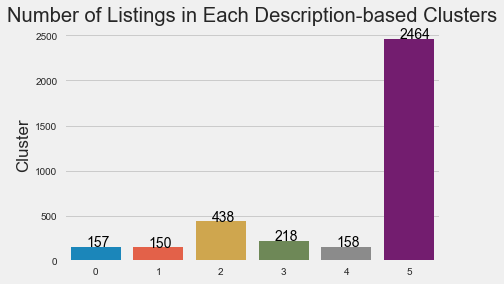

In [75]:
# Show and plot the number of listings in each cluster
ClusterCount = FullDescKmeans6['Cluster'].value_counts().sort_index()
ClusterCount = pd.DataFrame(ClusterCount)
ClusterCount.columns=['NumListings']
g = sns.barplot(x=FullDescKmeans6['Cluster'].value_counts().index,y=FullDescKmeans6['Cluster'].value_counts())
[g.text(p[0]-0.15,p[1]+5,p[1], color='black') for p in zip(g.get_xticks(), ClusterCount["NumListings"])]
plt.title('Number of Listings in Each Description-based Clusters')

#### Any close linkage between cluster and neighborhood?

Text(0.5,1,'Crosstab of Cluster and Neighbourhood')

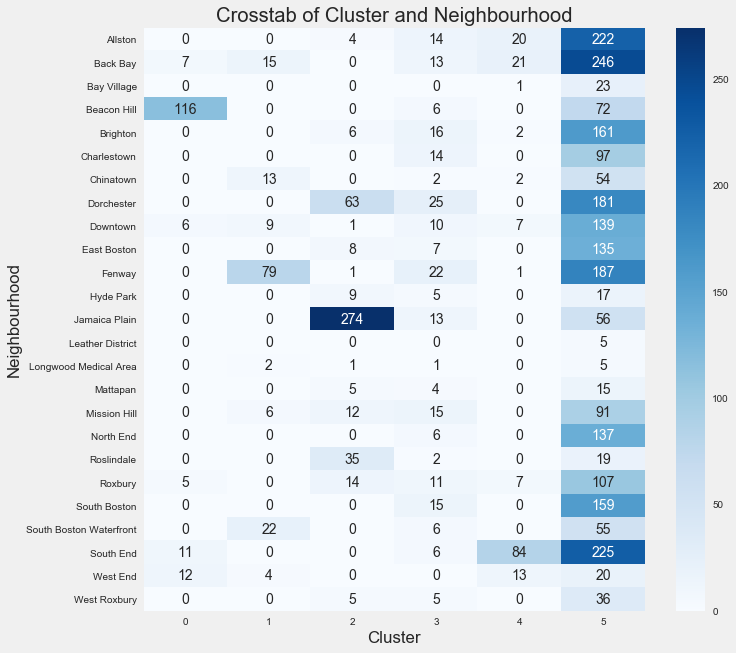

In [76]:
# Create crosstab between Cluster and Neighbourhood 
ctab = pd.crosstab(index=FullDescKmeans6['Neighbourhood'],columns=FullDescKmeans6['Cluster'])
plt.figure(figsize=(10,10))
sns.heatmap(ctab,annot=True,cmap='Blues', fmt='g')
plt.title("Crosstab of Cluster and Neighbourhood")

#### Top 30 words that describe each cluster

In [77]:

# Pipeline to identify top 30 words that are "best predictor" of a cluster
pipeline = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words='english', tokenizer=LemmaTokenizer())),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=42)),
])

In [79]:
modelSegment = pipeline.fit(listings_df['combined_description'],FullDescKmeans6['Cluster'])

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


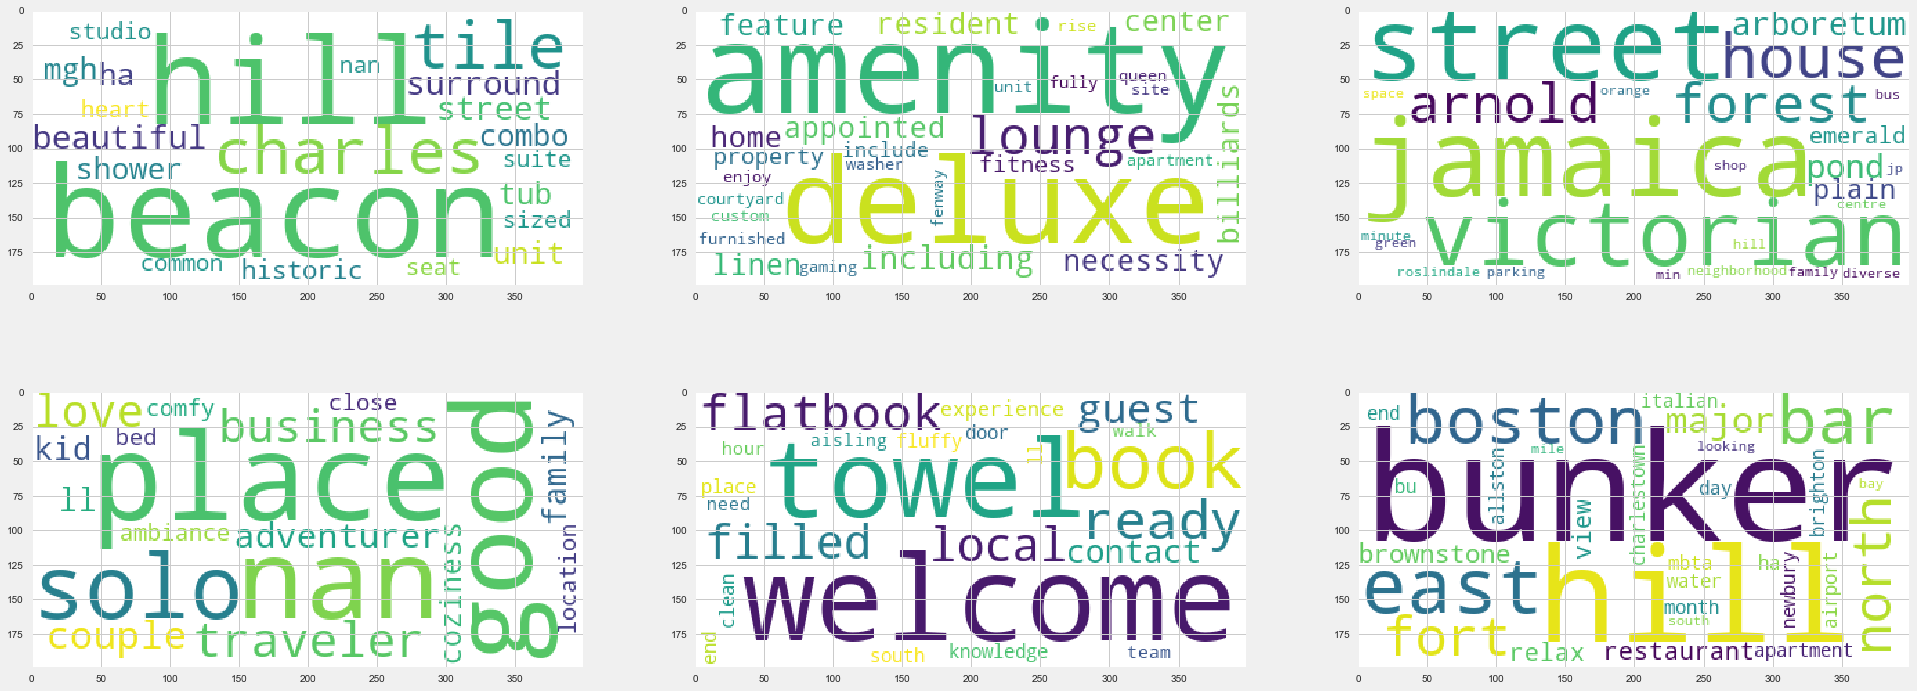

In [80]:

# Create wordcloud based on top-30 words
Keywords6 = {}
save_topn(modelSegment.named_steps['clf'], modelSegment.named_steps['tfidf'], [str(i) for i in range(6)], 30,outdict=Keywords6)
fig,axes=plt.subplots(2,3,figsize=(30,12))
for i in range(6):
    wordlist = list(Keywords6[i])
    wc = WordCloud(background_color='white',max_words=30,relative_scaling=0.2).generate(" ".join(wordlist))
    print(wc)
    axes[math.floor(i/3),i%3].imshow(wc)

### K-Means Clustering with 12 segments

In [ ]:
# Now we'll try to create a cluster of 12. Hopefully we could get a well spread clustering
kmeans12 = MiniBatchKMeans(n_clusters=12,batch_size=128)
DescKmeans12 = kmeans12.fit_predict(DescTfidf.todense())

In [ ]:
FullDescKmeans12 = pd.concat([pd.DataFrame(DescKmeans12),df[['combined_description','neighbourhood_cleansed']]],axis=1)
FullDescKmeans12.columns = ['Cluster','Description','Neighbourhood']
g = sns.barplot(x=FullDescKmeans12['Cluster'].value_counts().index,y=FullDescKmeans12['Cluster'].value_counts()) 
plt.title("Number of listings in each cluster")

In [ ]:
# Create crosstab between Cluster and Neighbourhood 
ctab = pd.crosstab(index=FullDescKmeans12['Neighbourhood'],columns=FullDescKmeans12['Cluster'])
plt.figure(figsize=(10,10))
sns.heatmap(ctab,annot=True,cmap='Blues', fmt='g')
plt.title("Crosstab of Cluster and Neighbourhood")

In [ ]:
# I previously use a regular print-out of the words, but now I am using a wordcloud instead
modelSegment = pipeline.fit(df['combined_description'],FullDescKmeans12['Cluster'])
# show_topn(modelSegment.named_steps['clf'], modelSegment.named_steps['tfidf'], [str(i) for i in range(12)], 20)

In [ ]:
# Create wordcloud based on top-30 words
Keywords12 = {}
save_topn(modelSegment.named_steps['clf'], modelSegment.named_steps['tfidf'], [str(i) for i in range(12)], 30,outdict=Keywords12)
fig,axes=plt.subplots(4,3,figsize=(20,20))
for i in range(12):
    wordlist = list(Keywords12[i])
    wc = WordCloud(background_color='white',max_words=30,relative_scaling=0.2).generate(" ".join(wordlist))
    print(wc)
    axes[math.floor(i/3),i%3].imshow(wc)

In [13]:
amenities_df = listings_df[['amenities','price','id']]
amenities_df.head()

,amenities,price,id
0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,12147973
1,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,3075044
2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,6976
3,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,1436513
4,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,7651065


In [14]:
amenity_list = count_word(amenities_df, 'amenities')

In [15]:
len(amenity_list)

46

In [16]:
amenity_list

[('Wireless Internet', 2960),
 ('Heating', 2930),
 ('Kitchen', 2837),
 ('Essentials', 2612),
 ('Smoke Detector', 2585),
 ('Air Conditioning', 2403),
 ('Internet', 2206),
 ('TV', 2200),
 ('Carbon Monoxide Detector', 2146),
 ('Dryer', 2119),
 ('Washer', 2118),
 ('Shampoo', 2087),
 ('Hangers', 1724),
 ('Laptop Friendly Workspace', 1595),
 ('Family/Kid Friendly', 1592),
 ('Iron', 1532),
 ('Hair Dryer', 1526),
 ('Cable TV', 1415),
 ('Fire Extinguisher', 1397),
 ('24-Hour Check-in', 1003),
 ('First Aid Kit', 987),
 ('Free Parking on Premises', 784),
 ('Buzzer/Wireless Intercom', 754),
 ('Elevator in Building', 697),
 ('translation missing: en.hosting_amenity_50', 505),
 ('Pets Allowed', 448),
 ('Lock on Bedroom Door', 443),
 ('Safety Card', 427),
 ('Pets live on this property', 420),
 ('translation missing: en.hosting_amenity_49', 390),
 ('Indoor Fireplace', 370),
 ('Gym', 350),
 ('Breakfast', 300),
 ('Dog(s)', 224),
 ('Doorman', 202),
 ('Cat(s)', 178),
 ('Hot Tub', 160),
 ('Wheelchair Acces

In [17]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

In [18]:
# split into columns
for value in amenity_list:
    amenities_df['amenities_' + value[0]] = amenities_df.apply(lambda row: get_val_from_list(row, 'amenities', value[0]),axis=1)

In [19]:
amenities_df.head()

,amenities,price,id,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Essentials,amenities_Smoke Detector,amenities_Air Conditioning,amenities_Internet,amenities_TV,amenities_Carbon Monoxide Detector,amenities_Dryer,amenities_Washer,amenities_Shampoo,amenities_Hangers,amenities_Laptop Friendly Workspace,amenities_Family/Kid Friendly,amenities_Iron,amenities_Hair Dryer,amenities_Cable TV,amenities_Fire Extinguisher,amenities_24-Hour Check-in,amenities_First Aid Kit,amenities_Free Parking on Premises,amenities_Buzzer/Wireless Intercom,amenities_Elevator in Building,amenities_translation missing: en.hosting_amenity_50,amenities_Pets Allowed,amenities_Lock on Bedroom Door,amenities_Safety Card,amenities_Pets live on this property,amenities_translation missing: en.hosting_amenity_49,amenities_Indoor Fireplace,amenities_Gym,amenities_Breakfast,amenities_Dog(s),amenities_Doorman,amenities_Cat(s),amenities_Hot Tub,amenities_Wheelchair Accessible,amenities_Suitable for Events,amenities_Pool,amenities_Smoking Allowed,amenities_Other pet(s),amenities_Free Parking on Street,amenities_Paid Parking Off Premises,amenities_Washer / Dryer,amenities_
0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,12147973,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,3075044,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,6976,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,1436513,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,7651065,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
features = pd.concat([features,amenities_df.iloc[:,4:]],axis=1)

In [26]:
features.shape

(3585, 56)

In [27]:
features.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Essentials,amenities_Smoke Detector,amenities_Air Conditioning,amenities_Internet,amenities_TV,amenities_Carbon Monoxide Detector,amenities_Dryer,amenities_Washer,amenities_Shampoo,amenities_Hangers,amenities_Laptop Friendly Workspace,amenities_Family/Kid Friendly,amenities_Iron,amenities_Hair Dryer,amenities_Cable TV,amenities_Fire Extinguisher,amenities_24-Hour Check-in,amenities_First Aid Kit,amenities_Free Parking on Premises,amenities_Buzzer/Wireless Intercom,amenities_Elevator in Building,amenities_translation missing: en.hosting_amenity_50,amenities_Pets Allowed,amenities_Lock on Bedroom Door,amenities_Safety Card,amenities_Pets live on this property,amenities_translation missing: en.hosting_amenity_49,amenities_Indoor Fireplace,amenities_Gym,amenities_Breakfast,amenities_Dog(s),amenities_Doorman,amenities_Cat(s),amenities_Hot Tub,amenities_Wheelchair Accessible,amenities_Suitable for Events,amenities_Pool,amenities_Smoking Allowed,amenities_Other pet(s),amenities_Free Parking on Street,amenities_Paid Parking Off Premises,amenities_Washer / Dryer,amenities_
0,1,1,4,1.5,2.0,3.0,250.0,1,0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,1.0,1.0,1.0,65.0,0,36,94.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2,1.0,1.0,1.0,65.0,1,41,98.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,4,1.0,1.0,2.0,75.0,2,1,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,2,1.5,1.0,2.0,79.0,1,29,99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 